Consier the follow nonlinear system of differential equations:
Next let's add some noise. Consider the system

$$ \begin{cases} \frac{dx}{dt}=\sigma(y-x) \\ \frac{dy}{dt}=x(\rho-z) -y\\ \frac{dz}{dt}=xy-\beta z  \end{cases}$$

This is system is called the Lorentz system and is a great example of a dynamical system which displays chaotic behavior. 

Below shows a simulation of this system using the Euler method with $\rho=28, \sigma=10, \text{ and }\beta=\frac{8}{3}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

rho = 28
sigma =10
beta =8/3

def F(position):
  x,y,z=position
  return sigma*(y-x),x*(rho-z)-y,x*y-beta*z

#initial is a vector with x,y,z coordinates, step is the step size, simulation_time is how many steps to take
def lorentz(initial,step,simulation_time):
  X = [initial[0]]
  Y = [initial[1]]
  Z = [initial[2]]
  for n in range(simulation_time):
    source = F([X[n],Y[n],Z[n]])
    X.append(X[n]+step*source[0])
    Y.append(Y[n]+step*source[1])
    Z.append(Z[n]+step*source[2])
  
  return X,Y,Z

In [2]:
initial = [1,1,1]
step = .001
simulation_time = 50000
path = lorentz(initial,step,simulation_time)


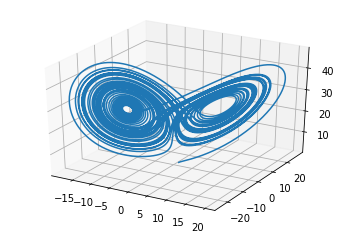

In [3]:
X,Y,Z = path
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(X,Y,Z)
plt.draw()
plt.show()

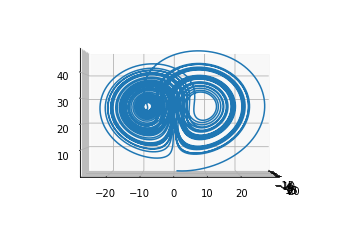

In [4]:
ax.view_init(0,0)
fig

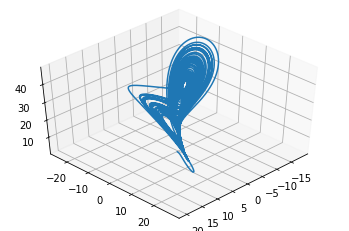

In [5]:
ax.view_init(45,45)
fig

Next let's add some noise. Consider the system

$$ \begin{cases} \frac{dx}{dt}=\sigma(y-x)+N(t) \\ \frac{dy}{dt}=x(\rho-z) -y+N(t)\\ \frac{dz}{dt}=xy-\beta z + N(t) \end{cases}$$

Where $N(t)\sim \mathcal{N}(0,.05)$ for each $t$. 

In [17]:
#Same as regular lorent but adds normally distributed noise at each time step
# noise ~ N(mu,s)
mu = 0
s = .05
# not sure if noise should be with the F function or inside the euler method? 
def squiggly_F(position):
  x,y,z=position
  return sigma*(y-x),x*(rho-z)-y,x*y-beta*z

def squiggly_lorentz(initial, step, simulation_time):
  X = [initial[0]]
  Y = [initial[1]]
  Z = [initial[2]]
  for n in range(simulation_time):
    source = squiggly_F([X[n],Y[n],Z[n]])
    X.append(X[n]+step*source[0]+np.random.normal(mu,s))
    Y.append(Y[n]+step*source[1]+np.random.normal(mu,s))
    Z.append(Z[n]+step*source[2]+np.random.normal(mu,s))
  
  return X,Y,Z

In [18]:
initial = [1,1,1]
step = .001
simulation_time = 20000
path = squiggly_lorentz(initial,step,simulation_time)
path2 = lorentz(initial,step,simulation_time)

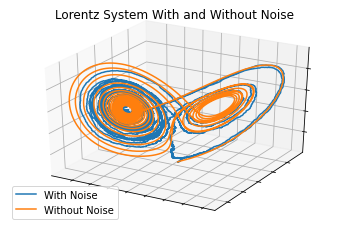

In [19]:
X,Y,Z = path
X2,Y2,Z2 = path2
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(X,Y,Z,label='With Noise')
ax.plot(X2,Y2,Z2, label='Without Noise')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])
#ax.axes.zaxis.set_visible(False)
plt.legend(loc="lower left")
plt.title('Lorentz System With and Without Noise')
plt.draw()
plt.show()

Let's look at the noisy system by itself as well. 

In [20]:
simulation_time = 20000
path = squiggly_lorentz(initial,step,simulation_time)

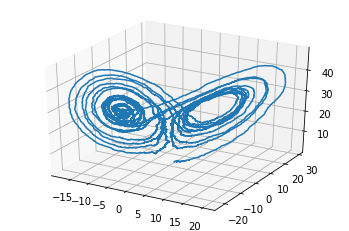

In [21]:
X,Y,Z = path
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(X,Y,Z)
plt.draw()
plt.show()

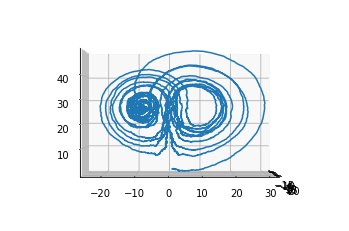

In [22]:
ax.view_init(0,0)
fig

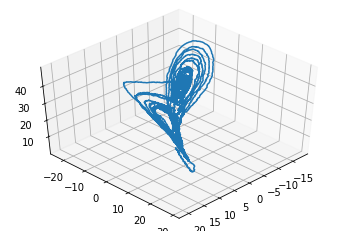

In [23]:
ax.view_init(45,45)
fig